In [21]:
import datetime
print(f"the last edit: {datetime.datetime.now()}")

the last edit: 2025-08-02 09:28:08.418977


In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.18.0


In [3]:
!nvidia-smi

Sat Aug  2 09:23:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-08-02 09:23:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-08-02 09:23:44 (95.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2025-08-02 09:23:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 64.233.170.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.4MB/s    in 8.3s    

2025-08-02 09:23:54 (19.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [8]:
# Creating training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

# 📚 Difference between `image_dataset_from_directory` vs `ImageDataGenerator` in TensorFlow

---

## ✅ 1. Purpose and API Style

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Introduced in** | TensorFlow 2.x (modern API) | TensorFlow 1.x (legacy API, still usable) |
| **Main usage** | Creates `tf.data.Dataset` objects | Generates batches of images using a Python generator |
| **Recommended for** | TF 2.x workflows, including tf.data pipelines | Legacy code, quick prototyping, or Keras 1.x/2.x projects |

---

## ✅ 2. Output Type

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Returns** | `tf.data.Dataset` (eager execution, parallelizable, efficient) | Python iterator / generator |
| **Supports `.map()`, `.batch()`, `.prefetch()`** | ✅ Yes | ❌ No |
| **TensorFlow Dataset API compatible** | ✅ Yes | ❌ No (unless wrapped manually) |

---

## ✅ 3. Data Loading and Preprocessing

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Loads all file paths into memory initially** | ✅ Yes (uses filenames then loads during iteration) | ✅ Yes |
| **Augmentation** | ❌ No built-in augmentation | ✅ Yes, supports real-time augmentation |
| **Preprocessing** | Basic: resizing, shuffling, batching | Advanced: rescaling, rotation, zoom, flips, etc. |

---

## ✅ 4. Augmentation

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Built-in augmentation** | ❌ No | ✅ Yes (`rotation_range`, `zoom_range`, etc.) |
| **Custom augmentation** | ✅ Use `.map()` with `tf.image` functions | ⚠️ Limited to Keras-style transformations |

---

## ✅ 5. Example Use

### 🟢 `image_dataset_from_directory`
```python
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "path/to/data",
    image_size=(224, 224),
    batch_size=32
)




```
### 🟠 Example: `ImageDataGenerator` with Augmentation

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    "path/to/data",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


```
## ✅ 6. Performance and Scalability

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Efficient for large datasets** | ✅ Yes (uses `tf.data`) | ❌ Less efficient |
| **GPU pipelining support** | ✅ Better (with `.prefetch()`) | ⚠️ Limited |
| **Recommended for production** | ✅ Yes | ⚠️ Not ideal |
| **Parallel data loading** | ✅ Uses `num_parallel_calls` | ❌ Not supported |
| **Shuffling** | ✅ Built-in with `shuffle=True` | ✅ Supported |
| **Caching** | ✅ With `.cache()` | ❌ Not supported |
| **Customization** | ✅ Easily extensible with `.map()` | ⚠️ Limited to predefined options |

---

## ✅ Summary Table

| Feature | `image_dataset_from_directory` | `ImageDataGenerator` |
|--------|-------------------------------|----------------------|
| **Output Type** | `tf.data.Dataset` | Python generator |
| **Augmentation** | ❌ No (but can use `.map()` + `tf.image`) | ✅ Built-in |
| **Performance** | ✅ High (uses efficient pipelines) | ⚠️ Lower |
| **TF 2.x Support** | ✅ Fully integrated | ⚠️ Legacy support |
| **Custom Preprocessing** | ✅ With `.map()` | ⚠️ Limited |
| **Data Pipeline Control** | ✅ Full control via `tf.data` | ❌ Not flexible |
| **Best Use Case** | Modern production training | Quick prototyping or legacy code |





In [9]:
# Create data inputs
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.23229599e+02 1.86229599e+02 8.22295914e+01]
   [2.27816330e+02 1.90816330e+02 8.68163300e+01]
   [2.31607132e+02 1.93607132e+02 9.26071396e+01]
   ...
   [6.21326485e+01 2.38417950e+01 5.98976803e+00]
   [6.32602386e+01 2.16173820e+01 4.85206604e+00]
   [6.12141113e+01 1.95712547e+01 2.98453188e+00]]

  [[2.20500000e+02 1.83525497e+02 7.73775558e+01]
   [2.20214294e+02 1.83214294e+02 7.89336777e+01]
   [2.21770416e+02 1.83770416e+02 8.33112259e+01]
   ...
   [6.63571014e+01 2.94132233e+01 3.19893765e+00]
   [6.80765457e+01 2.81377678e+01 2.78571439e+00]
   [6.53365631e+01 2.34079933e+01 5.96906424e-01]]

  [[2.15132660e+02 1.78994904e+02 6.78367386e+01]
   [2.13642868e+02 1.76642868e+02 7.05714264e+01]
   [2.16091843e+02 1.77923462e+02 7.95969391e+01]
   ...
   [7.24439163e+01 3.48265762e+01 4.59137261e-02]
   [7.98724670e+01 4.06734467e+01 3.87243795e+00]
   [7.55713196e+01 3.37856064e+01 0.00000000e+00]]

  ...

  [[2.47362259e+02 2.40362259e+02 1.86010223e+02]
   [2

### Model 0: Building a transfer learning model using the Keras Functional API

In [13]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# 4. if using Resnet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layer.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to thr base_model (note: using tf.keras.applications), EfficientnetV2 don't have to be normalized
x = base_model(inputs)

# 6. Averagw pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20250802-092405
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 969ms/step - accuracy: 0.2931 - loss: 2.0960 - val_accuracy: 0.6924 - val_loss: 1.3750
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.7770 - loss: 1.2020 - val_accuracy: 0.7648 - val_loss: 0.9386
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.8413 - loss: 0.8434 - val_accuracy: 0.8141 - val_loss: 0.7709
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.8436 - loss: 0.6881 - val_accuracy: 0.8257 - val_loss: 0.6670
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.8866 - loss: 0.5690 - val_accuracy: 0.8405 - val_loss: 0.6107


In [19]:
model_0.evaluate(test_data_10_percent)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.8469 - loss: 0.5826


[0.5695178508758545, 0.8579999804496765]

In [20]:
len(test_data_10_percent)

79

In [14]:
# check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_layer
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [15]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [16]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

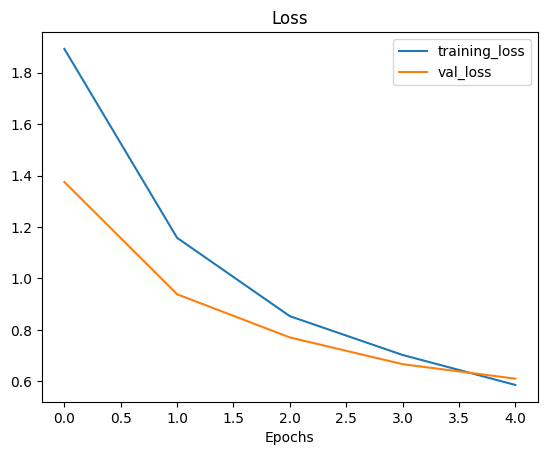

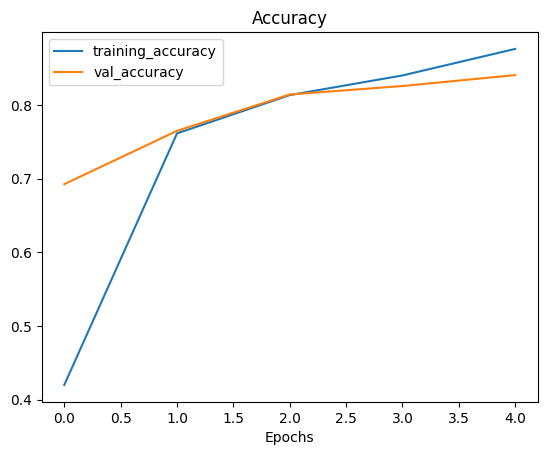

In [17]:
plot_loss_curves(history_10_percent)